# Data gathering and summarization of data

Gathering the raw data, reading into python, and describing. 

## Loading and processing data

This notebook is intended to run in the root directory of the project.

In [1]:
%matplotlib inline

In [2]:
%cd ..

/project


In [1]:
import os
from pathlib import Path
from pandas_profiling import ProfileReport
from src.data import *

Make sure the data is downloaded.

In [2]:
load_har_data_from_repo('data/raw')

### Loading the raw data

The activities recorded are encoded as the following.

In [9]:
activities = load_activity_names(); activities

,activity_id,activity_name
0,1,WALKING
1,2,WALKING_UPSTAIRS
2,3,WALKING_DOWNSTAIRS
3,4,SITTING
4,5,STANDING
5,6,LAYING


The raw recorded data contains 9 signals, stored as 2.56s windows (128 points in each row). We load the data for either `train` or `test`.

In [75]:
raw_df = load_raw_data().merge(activities).drop('activity_id', axis=1).sort_values(['subject_id', 'time_exp']).reset_index(drop=True)
raw_df.shape

(470528, 12)

In [76]:
raw_df.head()

,subject_id,time_exp,body_acc_x,body_acc_y,body_acc_z,body_gyro_x,body_gyro_y,body_gyro_z,total_acc_x,total_acc_y,total_acc_z,activity_name
0,1,0.00,0.000181,0.010767,0.055561,0.030191,0.066014,0.022859,1.012817,-0.123217,0.102934,STANDING
1,1,0.02,0.010139,0.006579,0.055125,0.043711,0.042699,0.010316,1.022833,-0.126876,0.105687,STANDING
2,1,0.04,0.009276,0.008929,0.048405,0.035688,0.074850,0.013250,1.022028,-0.124004,0.102102,STANDING
3,1,0.06,0.005066,0.007489,0.049775,0.040402,0.057320,0.017751,1.017877,-0.124928,0.106553,STANDING
4,1,0.08,0.010810,0.006141,0.043013,0.047097,0.052343,0.002553,1.023680,-0.125767,0.102814,STANDING


### Loading the feature data

The data provides a set of standard signal processing features. This is a total of 561 features. There are some duplicate fields, and we append the column index to their names.

In [77]:
features_df = load_feature_data().merge(activities).drop('activity_id', axis=1).sort_values(['subject_id', 'time_exp']).reset_index(drop=True)
features_df.shape

(7352, 564)

In [78]:
features_df.head()

,subject_id,time_exp,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",activity_name
0,1,0.00,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,1,1.28,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,1,2.56,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,1,3.84,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,1,5.12,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


## Standard summarization report via `pandas-profiling`

For both the raw and feature data, we compile comprehensive EDA reports.

* [Raw data report](reports/raw-profiling.html)
* [Features data report](reports/features-profiling.html)

As a summary,
* This data measures 6 activities being performed by 30 subjects
* There is a raw sensor data set of 9 signals, and 561 features derived from them

In [9]:
profile_raw = ProfileReport(raw_df, title="Pandas Profiling Report: raw signal data")
if not os.path.exists('reports'): os.mkdir('reports')
profile_raw.to_file("reports/raw-profiling.html")

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

/opt/conda/lib/python3.8/site-packages/scipy/stats/stats.py:4594: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

For the feature data we only compute the minimal report since there are many variables.

In [11]:
profile = ProfileReport(features_df, title="Pandas Profiling Report: feature signal data", minimal=True)
if not os.path.exists('reports'): os.mkdir('reports')
profile.to_file("reports/features-profiling.html")

Summarize dataset:   0%|          | 0/571 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Frequency of activity labels and time spent per activity

We compute the duration of each subject's recording. Since we are concerned with determining or predicting the activity being performed, we should know how distributed the activities have been performed by the subjects in the training data.

It looks like participants were measured for 6-8 minutes.

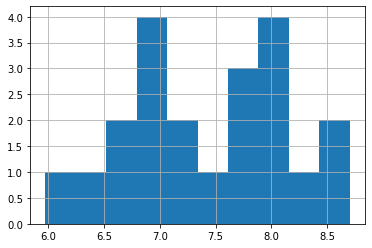

In [79]:
(features_df.groupby('subject_id').max()['time_exp']/60).hist();

Coverage of activity performed during each subject's recording looks fairly even, though a handful of subjects have a bit more of the standing, sitting, laying activities.

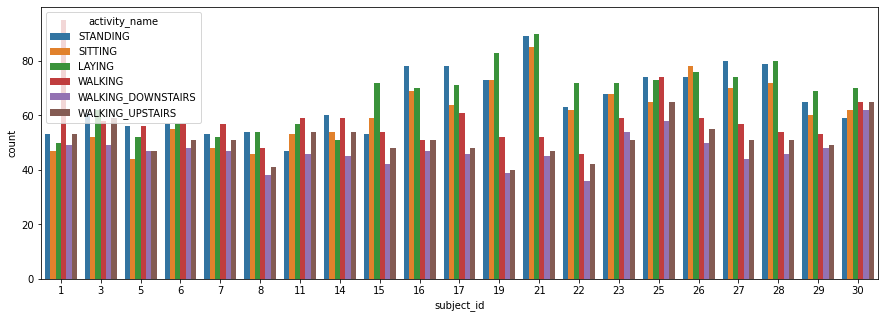

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 5))
sns.countplot(x='subject_id', hue='activity_name', data=features_df);